In [1]:
import pandas as pd
import numpy as np

In [2]:
#This dataframe has all headphone reviews filtered from Electronics Dataset
headphone_electronics = pd.read_pickle('headphone_df_final.pkl')

In [3]:
#Get Null values count for each column
empty_values_count = headphone_electronics.isna().sum()

# Print the number of empty values in each column
print("Number of empty values in each column:")
print(empty_values_count)

Number of empty values in each column:
overall                0
vote              554402
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             239659
reviewerName          79
reviewText            97
summary               94
unixReviewTime         0
image             632018
dtype: int64


In [4]:
columns_to_drop = ['vote', 'verified', 'unixReviewTime', 'image', 'summary']
headphone_electronics = headphone_electronics.drop(columns=columns_to_drop)

In [5]:
headphone_electronics.head()

,overall,reviewTime,reviewerID,asin,style,reviewerName,reviewText
2441,5.0,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,Great headphones. It's just the cord is too sh...
2442,5.0,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,Really like these headphone. Wanted something...
2443,1.0,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,Wire to headphone broke off in less than a mon...
2444,3.0,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,Very good
2445,1.0,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,Currently returning this product because the s...


In [6]:
#Get Null values count for each column
empty_values_count = headphone_electronics.isna().sum()

# Print the number of empty values in each column
print("Number of empty values in each column:")
print(empty_values_count)

Number of empty values in each column:
overall              0
reviewTime           0
reviewerID           0
asin                 0
style           239659
reviewerName        79
reviewText          97
dtype: int64


# Handling Missing values

In [7]:
#Replace the null values in style by empty list {}, reviewName and reviewText by empty string ""
headphone_electronics['style'] = headphone_electronics['style'].fillna({})

headphone_electronics['reviewerName'] = headphone_electronics['reviewerName'].fillna("")

headphone_electronics['reviewText'] = headphone_electronics['reviewText'].fillna("")

headphone_electronics.head()

,overall,reviewTime,reviewerID,asin,style,reviewerName,reviewText
2441,5.0,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,Great headphones. It's just the cord is too sh...
2442,5.0,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,Really like these headphone. Wanted something...
2443,1.0,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,Wire to headphone broke off in less than a mon...
2444,3.0,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,Very good
2445,1.0,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,Currently returning this product because the s...


In [8]:
print(headphone_electronics.shape)

(643077, 7)


# Handling Duplicate Rows

In [9]:
headphone_electronics_test = headphone_electronics
headphone_electronics_test['style'] = headphone_electronics_test['style'].astype(str)
num_duplicates = headphone_electronics_test.duplicated().sum()

print("Number of duplicate rows in the dataframe:", num_duplicates)

Number of duplicate rows in the dataframe: 17646


In [10]:
duplicate_indexes = headphone_electronics_test[headphone_electronics_test.duplicated()].index

print("Indexes of duplicate rows that need to be dropped:")
print(duplicate_indexes)
print(len(duplicate_indexes))

Indexes of duplicate rows that need to be dropped:
Index([  25886,   65101,   74003,   74004,   74005,  138865,  270268,  306739,
        331612,  335643,
       ...
       6173574, 6225955, 6225956, 6225957, 6225958, 6225959, 6225960, 6225961,
       6225962, 6225963],
      dtype='int64', length=17646)
17646


In [11]:
headphone_electronics = headphone_electronics.drop(duplicate_indexes)

In [12]:
print(headphone_electronics.shape)

(625431, 7)


# Total Number of Rows for HeadPhone Product

In [13]:
print(f"Total Number of Rows for HeadPhone are {len(headphone_electronics)}")

Total Number of Rows for HeadPhone are 625431


# Number of Reviews

In [14]:
filtered_df = headphone_electronics[headphone_electronics['reviewText'] != ""]

# Count the total number of rows
print(f"Number of Reviews are {len(filtered_df)}")

Number of Reviews are 625335


# Average Rating

In [15]:
average_rating = round(headphone_electronics['overall'].mean(), 2)
print(f"Average Rating is {average_rating}")

Average Rating is 4.11


# Number of Unique Products

In [16]:
import json
style_df = headphone_electronics
#print(style_df)

# Assuming new_df is your DataFrame

# Convert dictionary-like strings to JSON strings
style_df['style_json'] = style_df['style'].apply(lambda x: json.dumps(eval(x)) if x and x != 'nan' else np.nan)

# Drop rows with NaN values in the 'style_json' column
style_df = style_df.dropna(subset=['style_json'])

#print(style_df['style_json'])

# Get unique JSON strings
unique_json_strings = style_df['style_json'].unique()

# Convert JSON strings back to dictionaries and extract unique items
unique_items = set()
for json_string in unique_json_strings:
    if json_string is not None:
        style_dict = json.loads(json_string)
        unique_items.update(style_dict.values())

print(f"Number of Unique Products: {len(unique_items)}")

Number of Unique Products: 4497


# Number of Good Ratings

In [17]:
count_good = (headphone_electronics['overall'] >= 3).sum()
print(f"Number of Good Ratings (>= 3) is {count_good}")

Number of Good Ratings (>= 3) is 535699


# Number of Bad Ratings

In [18]:
count_bad = (headphone_electronics['overall'] < 3).sum()
print(f"Number of Bad Ratings (< 3) is {count_bad}")

Number of Bad Ratings (< 3) is 89732


# Number of Reviews corresponding to each Rating

In [19]:
filtered_df = []
filtered_df = headphone_electronics[headphone_electronics['overall'] != ""]

# Convert the 'overall' column to numeric type
filtered_df['overall'] = pd.to_numeric(filtered_df['overall'])

# Count the number of reviews corresponding to each value in the 'overall' column
reviews_count = filtered_df.groupby('overall').size()

print(f"Number of reviews per rating is as follows \n {reviews_count}")

Number of reviews per rating is as follows 
 overall
1.0     49079
2.0     40653
3.0     60768
4.0    117875
5.0    357056
dtype: int64


# Q5. Preprocess the Text

In [16]:
import re
import unicodedata
from bs4 import BeautifulSoup
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def preprocess_text(text):
    soup = BeautifulSoup(text, "html.parser")
    filter_text_1 = soup.get_text()
    filter_text_2 = unidecode(filter_text_1)
    acronyms = {"lol": "laugh out loud", 
                "brb": "be right back",
                "PR": "Performance Review",
                "ER": "Experience Report",
                "RR": "Rating Review",
                "SR": "Specification Review",
                "CR": "Consumer Report",
                "TR": "Tech Review",
                "FR": "Feature Review",
                "SR": "Sound Review",
                "RR": "Recommendation Report",
                "Lit": "Luminance Intensity Threshold",
                "Fire": "Flammability Index Ratio Estimator",
                "Fam": "Familial Association Metric",
                "GOAT": "Global Optimization Algorithm Technique",
                "Slay": "Statistical Layer Analysis Yield",
                "On point": "Optimal Numerical Point",
                "Snatched": "Sensor Network Attack Detection",
                "Dope": "Data Optimization Performance Evaluation",
                "Flex": "Feature-Level Extraction Process",
                "Savage": "Statistical Analysis of Variance and Generalized Estimation"
               }
    # Replace acronyms with their expansions
    for acronym, expansion in acronyms.items():
        filter_text_3 = filter_text_2.replace(acronym, expansion)
    filter_text_4 = re.sub(r'[^a-zA-Z\s]', '', filter_text_3)
    lemmatizer = WordNetLemmatizer()
    tokenized_text = word_tokenize(filter_text_4)
    lemmatized_text = [lemmatizer.lemmatize(word, pos='v') for word in tokenized_text]
    filter_text_5 = ' '.join(lemmatized_text)
    # Convert text to lowercase
    filter_text_6 = filter_text_5.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(filter_text_6)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    final_text = ' '.join(filtered_text)
    #print(final_text)
    return final_text

headphone_electronics['reviewText'] = headphone_electronics['reviewText'].apply(preprocess_text)

# Print the preprocessed DataFrame
print(headphone_electronics['reviewText'])

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "https://www.amazon.com/gp/product/B00HFX9WSG/ref=oh_aui_detailpage_o03_s00?ie=UTF8&psc=1#productDetails" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/lib/python3/dist-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=q24XURDTmoM" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/lib/python3/dist-packages/bs

2441                             great headphones cord short
2442       really like headphone wanted something office ...
2443                wire headphone break less month dont buy
2444                                                    good
2445       currently return product sound doesnt come spe...
                                 ...                        
6739463    work perfect purchase husband car hook phone v...
6739464    attractive solidly make cable unfortunately al...
6739559    use week time write work find earphone style q...
6739560    product work great get charge simply disconnec...
6739561    earphones good like design akin apple earphone...
Name: reviewText, Length: 625431, dtype: object


In [17]:
headphone_electronics.head()

,overall,reviewTime,reviewerID,asin,style,reviewerName,reviewText,style_json
2441,5.0,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,great headphones cord short,"{""Color:"": "" Blue W/Mic""}"
2442,5.0,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,really like headphone wanted something office ...,"{""Color:"": "" Blue Zebra W/Mic""}"
2443,1.0,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,wire headphone break less month dont buy,"{""Color:"": "" Blue W/Mic""}"
2444,3.0,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,good,"{""Color:"": "" Green""}"
2445,1.0,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,currently return product sound doesnt come spe...,"{""Color:"": "" Violet Purple""}"


In [18]:
headphone_electronics.to_pickle('pre_processed.pkl')

# Top 20 most reviewed brands in HeadPhones

In [21]:
meta_df = pd.read_pickle('Meta_Electronics.pkl')

In [22]:
#Get all rows from meta data where category has atleast headphones in it
indexes = []
for col in meta_df.columns:
    if meta_df[col].dtype == 'object':
        mask = meta_df[col].astype(str).str.contains('headphones', case=False)
        indexes.extend(meta_df[mask].index)

indexes = list(set(indexes))
indexes_df = pd.DataFrame(indexes, columns=['asin'])


# Create a new DataFrame containing only the rows where "headphones" occur
headphones_meta = meta_df.loc[indexes].reset_index(drop = True)

# Print the new DataFrame
print("Rows where 'headphones' occur:")
print()
headphones_meta.head()

Rows where 'headphones' occur:



,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"['Electronics', 'Headphones']",,"['* Answer/end / reject a call * Call redial, ...",,Stylish Wireless Stereo Bluetooth Headset/ Hea...,[],,MyNetDeals,['Bluetooth Ver 2.1 + EDR. Compatible with all...,"['>#5,689,866 in Cell Phones & Accessories (Se...",[],Cell Phones & Accessories,,,,B005V3IYHM,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
1,"['Electronics', 'Headphones', 'Earbud Headphon...",,['Evolved from personal monitor technology roa...,,Shure SE846-CL Sound Isolating Earphones with ...,[],,Shure,['Quad Hi-Definition MicroDrivers: For extende...,"['>#80,130 in Cell Phones & Accessories (See T...","['B003NSBKSW', 'B00KQOZA1Y', 'B07C7HNH88', 'B0...",All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","June 21, 2013",$28.01,B00DIUGW6A,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
2,"['Electronics', 'Headphones']",,[],,Stylish Wireless Stereo Bluetooth Headset/ Hea...,[],,MyNetDeals,['Bluetooth Ver 2.1 + EDR. Compatible with all...,"1,651,594 in Cell Phones & Accessories (",[],Amazon Devices,,</div>,,B005V3J3FE,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,"{'ASIN:': 'B005V3J3FE', ' Date first listed on..."
3,"['Electronics', 'Computers & Accessories', 'Ta...",,['Our highly favored Samsung Galaxy Tab 3 10.1...,,INVELLOP Black Leatherette Case Cover for Sams...,[],,INVELLOP,['Magnetic strip built inside for secure closu...,"['>#66,794 in Electronics > Computers & Access...",[],Computers,,"June 21, 2013",,B00DIW2YJM,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
4,"['Electronics', 'Headphones']",,['NMotion Earbud Features : Bluetooth 4.0 Ster...,,Jarv NMotion Wireless Bluetooth 4.0 Stereo Ear...,[],,Jarv,['Bluetooth 4.0 stereo earbuds with in-line mi...,"['>#414,519 in Cell Phones & Accessories (See ...",['B00IHJII4Q'],Cell Phones & Accessories,,,,B00M7NIZ3W,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}


In [23]:
print(headphones_meta.shape)

(46620, 19)


In [24]:
#Remove Duplicate
headphone_meta_test = headphones_meta
headphone_meta_test = headphone_meta_test.astype(str)
num_duplicates = headphone_meta_test.duplicated().sum()

print("Number of duplicate rows in the dataframe:", num_duplicates)

Number of duplicate rows in the dataframe: 1788


In [25]:
duplicate_indexes = []
duplicate_indexes = headphone_meta_test[headphone_meta_test.duplicated()].index

print("Indexes of duplicate rows that need to be dropped:")
print(duplicate_indexes)
print(len(duplicate_indexes))

Indexes of duplicate rows that need to be dropped:
Index([11582, 11584, 11585, 11586, 11588, 11589, 11597, 11609, 11610, 11614,
       ...
       22414, 22426, 22428, 22512, 30803, 31040, 34539, 34758, 38381, 38552],
      dtype='int64', length=1788)
1788


In [26]:
headphones_meta = headphones_meta.drop(duplicate_indexes)

In [27]:
print(headphones_meta.shape)

(44832, 19)


In [27]:
headphones_meta.to_pickle("Meta_final.pkl")

In [28]:
headphone_electronics.to_pickle("Electronics_final.pkl")

In [28]:
#Create a new dataframe with only asin and brand as the columns - asin being unique
unique_asin_values = headphone_electronics['asin'].unique()
print(len(unique_asin_values))
brand_name = headphones_meta[headphones_meta['asin'].isin(unique_asin_values)][['asin','brand']]
print(brand_name)

12843
             asin        brand
1      B00DIUGW6A        Shure
3      B00DIW2YJM     INVELLOP
4      B00M7NIZ3W         Jarv
9      B01232LZZQ         Mpow
12     B0019MLFYS           HP
...           ...          ...
46605  B00DIOAM4Y  Plantronics
46611  B00DIOALYA  Plantronics
46612  B00DIOALWC  Plantronics
46613  B00M7N36KO         Jarv
46614  B00M7NHK24         Jarv

[12843 rows x 2 columns]


In [29]:
merged_df = headphone_electronics

In [30]:
merged_df = pd.merge(headphone_electronics, brand_name[['asin', 'brand']], on='asin', how='inner')
print(merged_df)

        overall   reviewTime      reviewerID        asin  \
0           5.0  02 22, 2015  A38RQFVQ1AKJQQ  4126895493   
1           5.0   05 8, 2017  A299MRB9O6GWDE  4126895493   
2           1.0   11 5, 2016  A3ACFC6DQQLIQT  4126895493   
3           3.0  09 24, 2016  A36BC0YFDBNB5X  4126895493   
4           1.0  07 17, 2016  A212PQ0HQPNNWM  4126895493   
...         ...          ...             ...         ...   
625426      5.0  04 10, 2017  A23BQ4GZNFBLET  B01HI9GG30   
625427      3.0  02 11, 2017  A205H5OQKYCPSH  B01HI9GG30   
625428      5.0  01 17, 2017   AIW5NLEN5V40Y  B01HI9GG30   
625429      5.0   10 8, 2016  A39UA7Q4FLM0DL  B01HI9GG30   
625430      1.0  08 28, 2016  A3ND52BNMSF2WD  B01HI9GG30   

                                  style   reviewerName  \
0             {'Color:': ' Blue W/Mic'}  George Walker   
1       {'Color:': ' Blue Zebra W/Mic'}      Carolyn B   
2             {'Color:': ' Blue W/Mic'}             MK   
3                  {'Color:': ' Green'}        

In [31]:
nan_count = merged_df['brand'].isna().sum()
print(nan_count)

0


In [32]:
print(merged_df.shape)

(625431, 9)


In [33]:
new_headphone_electronics = merged_df
new_headphone_electronics.to_pickle('merged_df.pkl')

In [34]:
new_headphone_electronics = pd.read_pickle('merged_df.pkl')
reviews_count_by_brand = new_headphone_electronics.groupby('brand')['reviewText'].count()

# Sort the result in descending order
reviews_count_by_brand = reviews_count_by_brand.sort_values(ascending=False)

# Display the result
print(f"Top 20 most reviewed brands are {reviews_count_by_brand.head(20)}")

Top 20 most reviewed brands are brand
Sony              37457
Sennheiser        22977
Plantronics       11948
Bose              11583
Panasonic          8519
Skullcandy         7897
Mpow               7605
JLAB               7513
Roku               7469
JVC                7114
TaoTronics         7065
Samsung            7065
Audio-Technica     7056
Philips            7052
Koss               7002
Kinivo             6444
Apple              6375
Etre Jeune         5970
AmazonBasics       5898
LG                 5695
Name: reviewText, dtype: int64


# Top 20 least reviewed brands in HeadPhones

In [35]:
# Sort the result in descending order
reviews_count_by_brand_1 = reviews_count_by_brand.sort_values(ascending=True)

# Display the result
print(f"Top 20 least reviewed brands are {reviews_count_by_brand_1.head(20)}")

Top 20 least reviewed brands are brand
Honda                    1
Digital Antenna          1
Zelco Industries, Inc    3
Fred & Friends           3
DSI                      3
NOIZY Brands             3
DetectorPro              4
SOUND-SQUARED CO.        4
SmartDisk                4
Replug                   4
YooZoo                   4
MEDca                    5
Abusun                   5
Basstyle                 5
BearsFire                5
ATEX                     5
ABC(TM)                  5
lexastech                5
meda one                 5
EveryMarket              5
Name: reviewText, dtype: int64


# Most Positively Reviewed Headphone

In [36]:
average_rating_by_brand = new_headphone_electronics.groupby('brand')['overall'].mean()

highest_rated_brand = average_rating_by_brand.idxmax()
highest_average_rating = average_rating_by_brand.max()

print("Highest rated brand:", highest_rated_brand)
print("Average rating:", highest_average_rating)

Highest rated brand: 4 in 1 Charger
Average rating: 5.0


# Show the count of ratings for the product over 5 consecutive years.

In [37]:
ratings_df = new_headphone_electronics
ratings_df['reviewTime'] = pd.to_datetime(ratings_df['reviewTime'], format='%m %d, %Y')

# Get the maximum year present in the dataset
max_year = ratings_df['reviewTime'].dt.year.max()

# Calculate the start year for the latest 5 years
start_year = max_year - 4

# Filter ratings for the latest 5 years
ratings_in_range = ratings_df[(ratings_df['reviewTime'].dt.year >= start_year) & (ratings_df['reviewTime'].dt.year <= max_year)]

# Count the ratings for each year
ratings_count_by_year = ratings_in_range['reviewTime'].dt.year.value_counts().sort_index()

print("Count of ratings for the last 5 years:")
print(ratings_count_by_year)

Count of ratings for the last 5 years:
reviewTime
2014     93590
2015    145260
2016    143320
2017     80955
2018     32366
Name: count, dtype: int64


# Word cloud for good and bad reviews

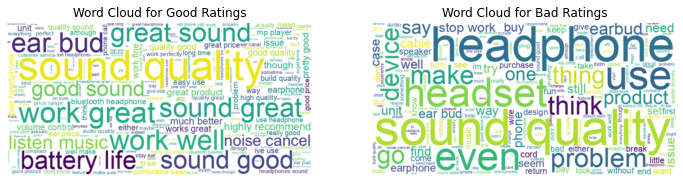

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

reviews_df = new_headphone_electronics

# Tokenize the good reviews
good_text = ' '.join(reviews_df[reviews_df['overall'] >= 3]['reviewText'])
good_words = word_tokenize(good_text)

# Tokenize the bad reviews
bad_text = ' '.join(reviews_df[reviews_df['overall'] < 3]['reviewText'])
bad_words = word_tokenize(bad_text)

# Specify the path to a TrueType font file
font_path = "Arial.ttf"

# Generate word clouds with the specified font
good_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(good_words))
bad_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(bad_words))

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Good Ratings')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Bad Ratings')
plt.axis('off')

plt.show()


In [83]:
#good_word_freq = {word: good_words.count(word) for word in good_words}
from collections import Counter
import heapq

good_word_freq = Counter(good_words)
#print(good_word_freq)
bad_word_freq = Counter(bad_words)

#Report the most common words for positive and negative reviews
#print("Most commonly used words for positive reviews:")
#print(sorted(good_word_freq.items(), key=lambda x: x[1], reverse=True)[:10])  # Display top 10 words

# Get top 10 most common words
top_words = heapq.nlargest(10, good_word_freq.items(), key=lambda x: x[1])

print("Most commonly used words for good reviews:")
for word, count in top_words:
    print(word, "-", count)

print('-------------------------------------------------------')

top_bad_words = heapq.nlargest(10, bad_word_freq.items(), key=lambda x: x[1])

print("Most commonly used words for bad reviews:")
for word, count in top_bad_words:
    print(word, "-", count)

Most commonly used words for good reviews:
sound - 355476
use - 278604
headphones - 263165
great - 233230
good - 222220
work - 188505
get - 174081
quality - 165244
like - 162151
one - 133130
-------------------------------------------------------
Most commonly used words for bad reviews:
sound - 55101
work - 43919
use - 41971
headphones - 37902
get - 37185
one - 27859
quality - 26193
buy - 25795
would - 25068
good - 24909


# Plot a pie chart for Distribution of Ratings vs. the No. of Reviews.

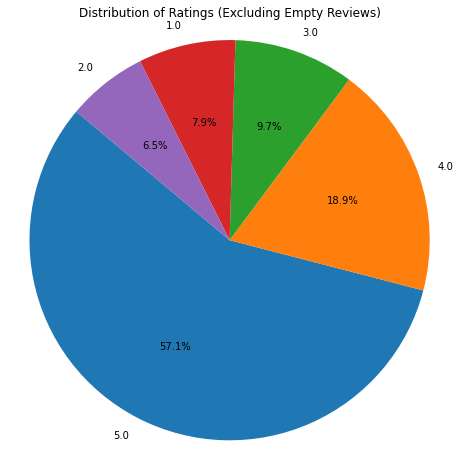

In [38]:
import matplotlib.pyplot as plt

valid_reviews_df = new_headphone_electronics[new_headphone_electronics['reviewText'] != ""]

# Count the number of reviews for each rating category
rating_counts = valid_reviews_df['overall'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings (Excluding Empty Reviews)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



# Report in which year the product got maximum reviews. 

In [39]:
new_headphone_electronics['reviewTime'] = pd.to_datetime(new_headphone_electronics['reviewTime'], format='%m %d, %Y')

# Extract the year from the 'date' column
new_headphone_electronics['year'] = new_headphone_electronics['reviewTime'].dt.year

# Count the number of reviews for each year
reviews_per_year = new_headphone_electronics['year'].value_counts()

# Find the year with the maximum number of reviews
max_reviews_year = reviews_per_year.idxmax()

print("Year with maximum reviews:", max_reviews_year)

Year with maximum reviews: 2015


# Which year has the highest number of Customers?

In [40]:
new_headphone_electronics['reviewTime'] = pd.to_datetime(new_headphone_electronics['reviewTime'], format='%m %d, %Y')

# Extract the year from the 'date' column
new_headphone_electronics['year'] = new_headphone_electronics['reviewTime'].dt.year

# Count the number of unique customers for each year
customers_per_year = new_headphone_electronics.groupby('year')['reviewerID'].nunique()

# Find the year with the highest number of customers
max_customers_year = customers_per_year.idxmax()

print("Year with the highest number of customers:", max_customers_year)

Year with the highest number of customers: 2016
